# 15.0 - ***Deep Learning*** - AlexNet- image classification of Cifar dataset having airplanes, dogs, ship, birds etc using AlexNet

Youtube [AlexNet - CNN Explained and Implemented](https://www.youtube.com/watch?v=8GheVe2UmUM&ab_channel=ShriramVasudevan)

Paper **['ImageNet classification with deep convolutional neural networks'](https://proceedings.neurips.cc/paper/2012/file/c399862d3b9d6b76c8436e924a68c45b-Paper.pdf)** 

DOI https://doi.org/10.1145/3065386

### The Architecture of the AlexNet

- Five Convolution Layers
- Three Fully Connected Layers
- The final layer is **softmax**

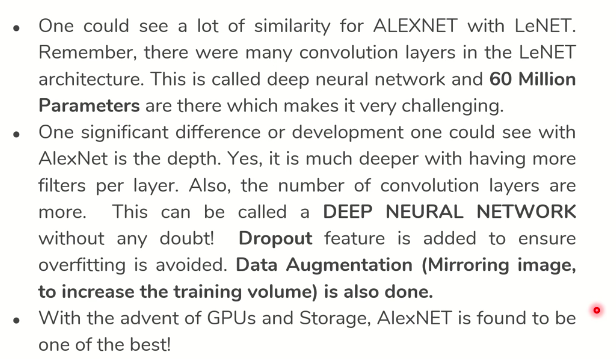

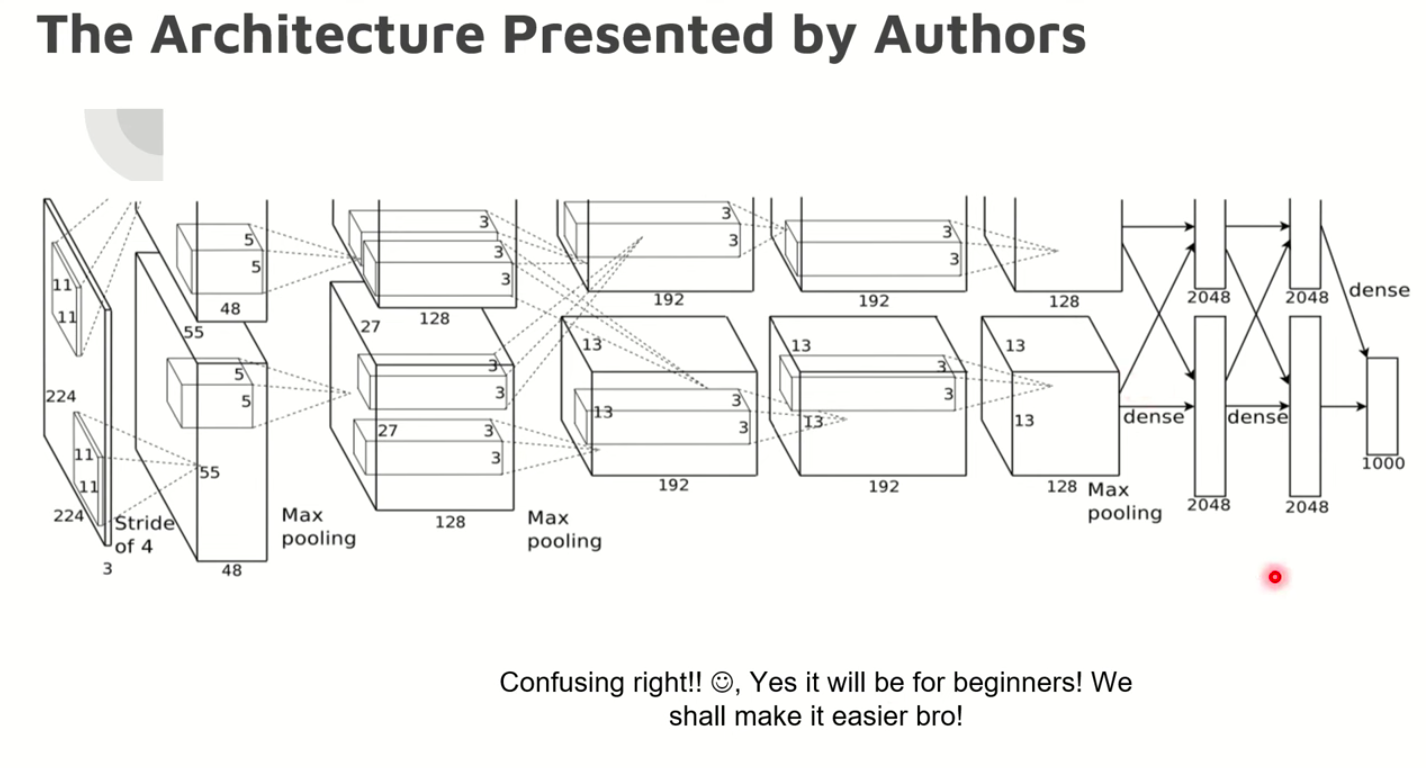

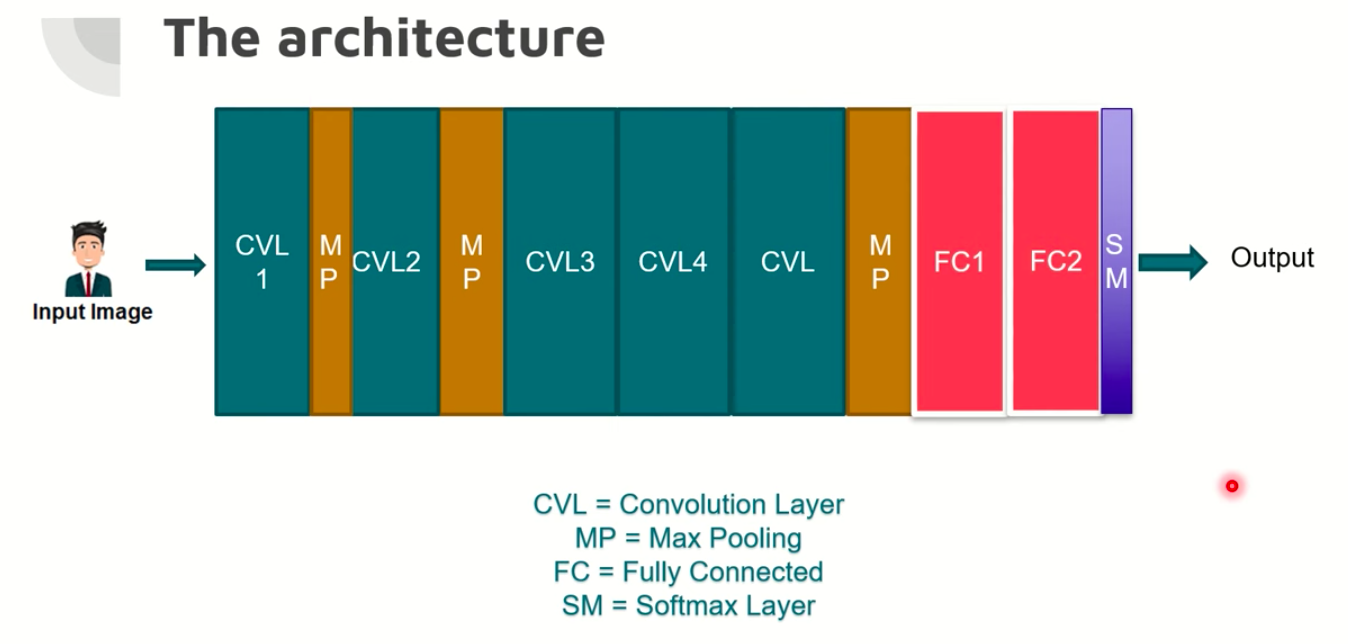

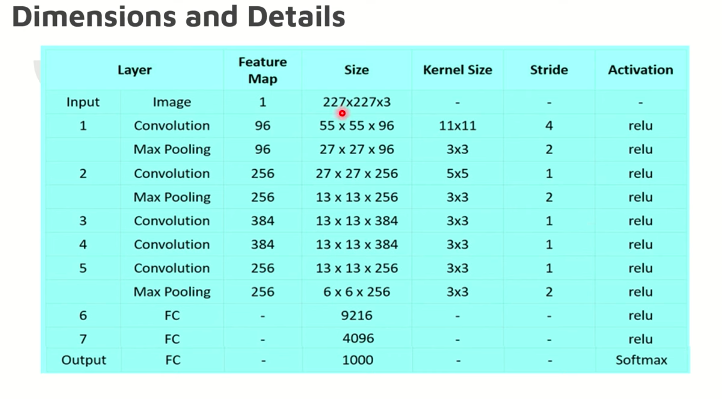

In [61]:
import keras

# Sequential from keras.models gets our neural network as Sequential Network
# Sequential Network can be sequential layers or graph
from keras.models import Sequential

# Dropout is a technique used to prevent a model from overfitting
from keras.layers import Dense, Activation, Dropout, Flatten, Conv2D, MaxPooling2D

# for normalization
from tensorflow.keras.layers import BatchNormalization
# from keras.layers.normalization import BatchNormalization

from keras.models import load_model
from keras.layers import Lambda
import tensorflow as tf
from keras.utils.np_utils import to_categorical

import numpy as np
import pandas as pd
import warnings
warnings.simplefilter("ignore", category=RuntimeWarning)
pd.options.mode.chained_assignment = None 

In [7]:
image_shape = (227, 227, 3)

In [9]:
# Instantiate an empty model
np.random.seed(1000)

In [10]:
model = Sequential()

2022-11-25 02:38:01.516600: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [29]:
# 1st convolutional layer
model.add(Conv2D(filters=96, 
                 input_shape=image_shape, 
                 kernel_size=(11,11), 
                 strides=(4,4), 
                 padding='same', 
                 data_format='channels_first'))
model.add(Activation('relu'))

# Max Pooling
model.add(MaxPooling2D(pool_size=(3,3), strides=(2,2), padding='same'))

**The first layer has 96 filters, the input shape is 227 x 227 x 3. Kernel size is 11 x 11, Striding 4 x 4, Relu is the activation function.**

In [28]:
# 2nd convolutional layer
model.add(Conv2D(filters=256, kernel_size=(5,5), strides=(1,1), padding='same'))
model.add(Activation('relu'))

# MaxPooling
model.add(MaxPooling2D(pool_size=(3,3), strides=(2,2), padding='same'))

In [30]:
# 3rd convolutional layer
model.add(Conv2D(filters=384, kernel_size=(3,3), strides=(1,1), padding='same'))
model.add(Activation('relu'))

In [32]:
# 4th convolutional layer
model.add(Conv2D(filters=384, kernel_size=(3,3), strides=(1,1), padding='same'))
model.add(Activation('relu'))

In [34]:
# 5th convolutional layer
model.add(Conv2D(filters=384, kernel_size=(3,3), strides=(1,1), padding='same'))
model.add(Activation('relu'))

# MaxPooling
model.add(MaxPooling2D(pool_size=(3,3), strides=(2,2), padding='same'))

In [35]:
# Passing it to fully connected layer, we do flatten
model.add(Flatten())

In [37]:
# 1st fully connected layer has 4096 neurons
model.add(Dense(4096, input_shape=(227*227*3,)))
model.add(Activation('relu'))

# Add Dropout to prevent overfitting
model.add(Dropout(0.4))

In [38]:
# 2nd fully connected layer
model.add(Dense(4096))
model.add(Activation('relu'))

# Add Dropout
model.add(Dropout(0.4))

In [59]:
# Output layer
model.add(Dense(1000))
model.add(Activation('softmax'))

In [54]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 55, 55, 96)        34944     
                                                                 
 conv2d_1 (Conv2D)           (None, 12, 12, 96)        1115232   
                                                                 
 activation (Activation)     (None, 12, 12, 96)        0         
                                                                 
 max_pooling2d (MaxPooling2D  (None, 5, 5, 96)         0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 1, 1, 256)         614656    
                                                                 
 activation_1 (Activation)   (None, 1, 1, 256)         0         
                                                        

In [65]:
# Compile the model
loss_fn = keras.losses.CategoricalCrossentropy()
# loss_fn = keras.losses.SparseCategoricalCrossentropy()

# pass optimizer by name: default parameters will be used
model.compile(loss = loss_fn, optimizer='adam', metrics=['accuracy'])

In [66]:
# model.fit(x, y,
#               batch_size=128,
#               epochs=2,
#               validation_split = 0.2)

***Thank you for going through this project. Your comments are more then welcome to ybezginova2021@gmail.com***

***Best wishes,***

***Yulia***